<a href="https://colab.research.google.com/github/adib0073/Educative_SSDS_course/blob/main/notebooks/Text_Analytics_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NLTK Text Analytics Tutorial for Beginners

In [23]:
# Importing required Python libraries
import os
from glob import glob
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Downloading IMDB moview review dataset

In [3]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  11.5M      0  0:00:06  0:00:06 --:--:-- 18.3M


In [4]:
# Check if dataset is downloaded
!ls

aclImdb  aclImdb_v1.tar.gz  sample_data


In [5]:
!ls aclImdb/

imdbEr.txt  imdb.vocab	README	test  train


In [6]:
# Inspect folder structure of the training dataset
!ls aclImdb/train

labeledBow.feat  pos	unsupBow.feat  urls_pos.txt
neg		 unsup	urls_neg.txt   urls_unsup.txt


In [7]:
# Inspect folder structure of the test dataset
!ls aclImdb/test

labeledBow.feat  neg  pos  urls_neg.txt  urls_pos.txt


### Inspecting the dataset

In [8]:
!cat aclImdb/train/pos/4012_8.txt

After some difficulty, Johnny Yuma arrives at his ailing uncle's ranch to take over day to day operations, only to find out that the old man has been murdered by his beautiful gold-digger wife and the woman's vicious brother.<br /><br />Good production values, a likable performance by Mark Damon, and a breezy action packed script combine to make this an entertaining, if not exceptionally deep, above average addition to the spaghetti western genre.<br /><br />Co-star Rosalba Neri is one of the hottest European babes ever to grace the screen. Here she's absolutely perfect as the cold-hearted user (and abuser) of weak men.<br /><br />Damon and Neri appeared together in at least one other picture, The Devil's Wedding Night, a pretty good horror movie that's of particular interest for those of you that want to see what's underneath Rosalba's dresses.

In [14]:
!cat aclImdb/train/neg/5003_4.txt

I'm embarrassed to be writing this review. I say that because those of you reading it will know that I sat through the whole thing and that is embarrassing to admit even to strangers. But I just had to warn those who read the viewer comments on IMDb before they watch a film not to watch this one. It's the least I can do. This is a bad movie! Trust me. The plot is goofy. The acting is amateurish. And the directing, camera work, sets, costumes, etc. are all second rate. Let it go.

In [15]:
# Analyzing the sample size of the dataset

train_path = "aclImdb/train"
test_path = "aclImdb/test"

print("====================Train Set====================")
print(f"We have: {len(os.listdir(train_path+'/pos'))} positive reviews.")
print(f"We have: {len(os.listdir(train_path+'/neg'))} negative reviews.")

print("====================Test Set====================")
print(f"We have: {len(os.listdir(test_path+'/pos'))} positive reviews.")
print(f"We have: {len(os.listdir(test_path+'/neg'))} negative reviews.")

====================Train Set====================
We have: 12500 positive reviews.
We have: 12500 negative reviews.
====================Test Set====================
We have: 12500 positive reviews.
We have: 12500 negative reviews.


In [18]:
# Loading data as a list
pos_files = glob(train_path + '/pos/*')
neg_files = glob(train_path + '/neg/*')

def read_txt(FilePath):
    with open(FilePath,'r') as fp:
        txt = fp.read()
    return txt

POS_TXTS = [read_txt(fp) for fp in pos_files]
NEG_TXTS = [read_txt(fp) for fp in neg_files]

In [19]:
len(pos_files),len(neg_files)

(12500, 12500)

In [21]:
# Converting list data as a dataframe
Datax = pd.DataFrame(list(zip(POS_TXTS, 
                     [1]*len(POS_TXTS))) + list(zip(NEG_TXTS,[0]*len(NEG_TXTS))) ,
                     columns =['text','target'])

In [22]:
# Let's take a glance of the text data dataframe
Datax.head()

,text,target
0,"I was not expecting much from this movie, but ...",1
1,Before Sunrise is romance for the slacker gene...,1
2,Every scene was put together perfectly.This mo...,1
3,""" Now in India's sunny 'clime, where I use to ...",1
4,"For the record, I am not affiliated with the p...",1


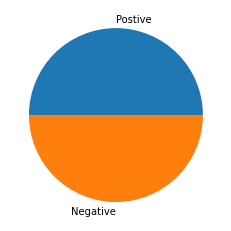

In [27]:
plt.pie(Datax['target'].value_counts(), labels = ['Postive', 'Negative'])
plt.show()